In [1]:
pip install finterstellar

In [1]:
import finterstellar as fs

In [2]:
df = fs.fn_single(otp='OTP', symbol='TSLA', window='T')

In [3]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

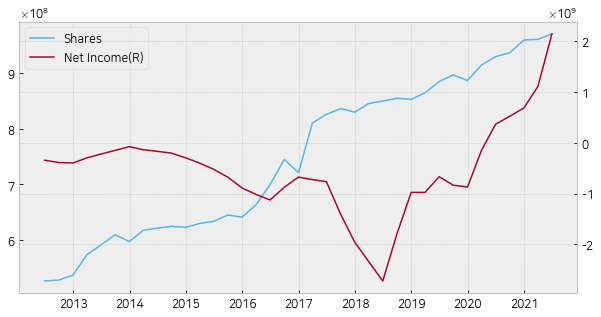

In [4]:
fs.draw_chart(df, left='Shares', right='Net Income')

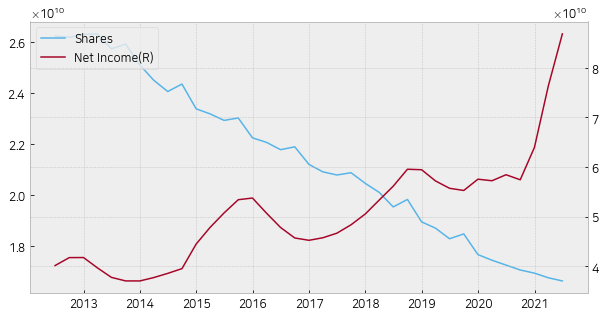

In [6]:
df = fs.fn_single(otp='OTP', symbol='AAPL', window='T')
fs.draw_chart(df, left='Shares', right='Net Income')

In [7]:
# 증자X
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
prev_t = terms[0]
for t in terms:
    data[t]['Share Increase'] =  data[t]['Shares'] / data[prev_t]['Shares'] 
    prev_t = t
    s[t] = fs.fn_filter(data[t], by='Share Increase', floor=.95, cap=1)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 7.85%
Accumulated return: 113.08%
Investment period: 10.0yrs
Sharpe ratio: 0.75
MDD: -22.40%


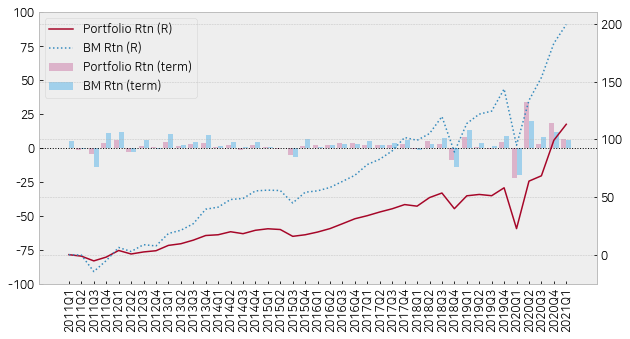

In [8]:
fs.draw_return(df)